#### Preprocessing

In [115]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/oliveirakay/71f06cf711f12fb9fc8907d3f3f4db61/raw/ea027e4e1dbc9205b94e484ef727358f7f93fbf9/Customer-churn.csv")

In [116]:
traducao_dic = {'Sim' : 1, 'Nao': 0}
dados_modificados = df[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)

In [117]:
dummie_dados = pd.get_dummies(df.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1),dtype=int) 

In [118]:
dados_final = pd.concat([dummie_dados,dados_modificados], axis=1)

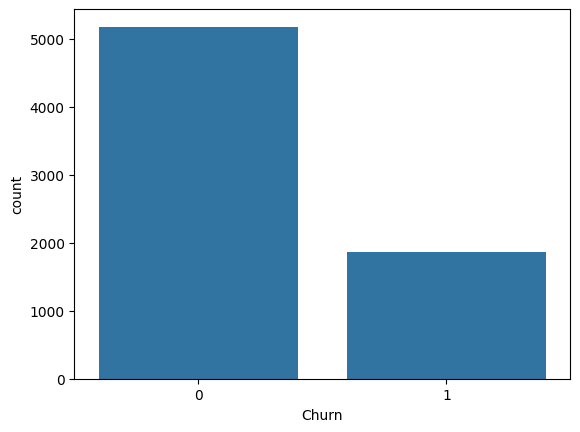

In [119]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [120]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [121]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

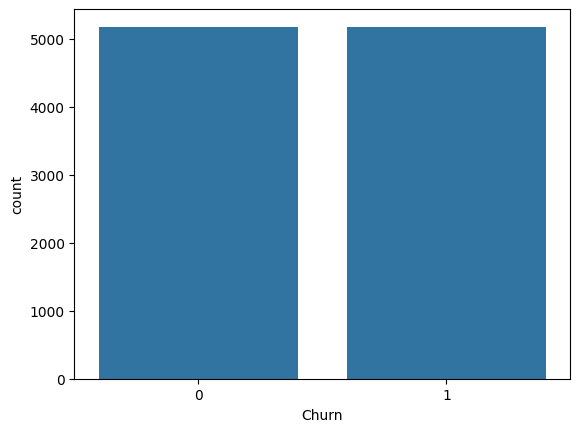

In [122]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

#### KNN